In [313]:
import numpy as np
from pathlib import Path
from IPython.display import display
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

# MNIST dataset

- **The MNIST database of handwritten digits**
    http://yann.lecun.com/exdb/mnist/

- **TRAINING SET IMAGE FILE (train-images-idx3-ubyte)**

>`
[offset] [type]          [value]          [description]
0000     32 bit integer  0x00000803(2051) magic number
0004     32 bit integer  60000            number of images
0008     32 bit integer  28               number of rows
0012     32 bit integer  28               number of columns
0016     unsigned byte   ??               pixel
0017     unsigned byte   ??               pixel
........
xxxx     unsigned byte   ??               pixel
Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).
`

- **TRAINING SET LABEL FILE (train-labels-idx1-ubyte)**

>`
[offset] [type]          [value]          [description]
0000     32 bit integer  0x00000801(2049) magic number (MSB first)
0004     32 bit integer  60000            number of items
0008     unsigned byte   ??               label
0009     unsigned byte   ??               label
........
xxxx     unsigned byte   ??               label
The labels values are 0 to 9.
`

In [31]:
train_img_gz_url = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
train_label_gz_url = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'

test_img_gz_url = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
test_label_gz_url = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'

gz_urls = [train_img_gz_url, train_label_gz_url,
           test_img_gz_url, test_label_gz_url]
for url in gz_urls:
    url_path = Path(url)
    if not Path(url_path.name).exists():
        !wget $url
        
gz_local_files = [Path(url).name for url in gz_urls]
for gz_file in gz_local_files:
    !gzip -dr $gz_file 


--2021-01-01 19:47:09--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.7.204, 104.28.6.204, 172.67.171.76, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.7.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  7.95MB/s    in 1.2s    

2021-01-01 19:47:10 (7.95 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-01-01 19:47:10--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.6.204, 104.28.7.204, 172.67.171.76, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.6.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K  --.-KB

In [25]:
gz_local_files

['train-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz',
 't10k-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz']

In [165]:
import struct
def read_mnist_images(file):

    with open(file, 'rb') as f:
        content = f.read()
        magic, img_count, rows, cols = struct.unpack('>iiii', content[0:16])
        pixels = np.frombuffer(content[16:], dtype=np.uint8).copy()
        imgs = pixels.reshape((-1, 1, rows, cols))
        
    return imgs

def read_labels(file):
    with open(file, 'rb') as f:
        content = f.read()
        magic, count = struct.unpack('>ii', content[:8])
        labels = np.frombuffer(content[8:], dtype=np.uint8)
        
        return labels

In [166]:
train_imgs = read_mnist_images('train-images-idx3-ubyte')
train_labels = read_labels('train-labels-idx1-ubyte')

train_imgs.shape, train_labels.shape

((60000, 1, 28, 28), (60000,))

In [167]:
test_imgs = read_mnist_images('t10k-images-idx3-ubyte')
test_labels = read_labels('t10k-labels-idx1-ubyte')

test_imgs.shape, test_labels.shape

((10000, 1, 28, 28), (10000,))

In [269]:
train_imgs[0][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [169]:
display(Image.fromarray(train_imgs[0][0])), train_labels[0]

(None, 5)

In [170]:
display(Image.fromarray(test_imgs[0][0])), test_labels[0]

(None, 7)

# Dataset

In [294]:
class ChengDataset(torch.utils.data.Dataset):
    def __init__(self, imgs, labels):
        super(ChengDataset, self).__init__()
        self._imgs = imgs
        self._labels = labels
        
    def __len__(self):
        return len(self._imgs)
    
    def __getitem__(self, index):
        img = torch.tensor(self._imgs[index]).float()
        label = torch.tensor(self._labels[index]).long()
        return img, label

In [351]:
# data
BATCH_SIZE = 32
train_dataset = ChengDataset(train_imgs, train_labels)
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True)

test_dataset = ChengDataset(test_imgs, test_labels)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True)


# Models

In [278]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [352]:
def train(model, train_dataloader, epoches, optimizer, loss_func,):
    train_losses = []
    for i in range(epoches):
        model.train()
        for batch_index, batch in enumerate(train_dataloader):
            batch_imgs, batch_labels = batch[0], batch[1]
            batch_preds = model(batch_imgs)
            loss = loss_func(batch_preds, batch_labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
            
            if batch_index % 100 == 0:
                accuracy = (torch.argmax(batch_preds, dim=1)==batch_labels).float().mean()
                print(f'epochs: {i}, train accuracy: {accuracy}')
    return train_losses
    
def test(model, test_dataloader):
    model.eval()
    
    corrects = torch.tensor([])
    for batch_index, batch in enumerate(test_dataloader):
        batch_imgs, batch_labels = batch[0], batch[1]
        batch_preds = model(batch_imgs)
        corrects = torch.cat((corrects, (torch.argmax(batch_preds, dim=1) == batch_labels)))
    
    accuracy = corrects.float().mean()
    return accuracy, corrects

## Wide Model


- 200 channels
- 3 layers

In [349]:
class ChengMNIST(nn.Module):
    def __init__(self):
        super(ChengMNIST, self).__init__()
        self._cv1 = nn.Conv2d(in_channels=1, out_channels=200, kernel_size=3, padding=1, stride=1, bias=True)        
        self._cv2 = nn.Conv2d(in_channels=200, out_channels=1, kernel_size=3, padding=1, stride=1, bias=True)
        
        self._flatten1 = nn.Flatten()
        self._linear1 = nn.Linear(in_features=7*7, out_features=10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self._cv1(x), kernel_size=2))
        x = F.relu(F.max_pool2d(self._cv2(x), kernel_size=2))       
        x = self._flatten1(x)
        x = self._linear1(x)
        return x


epochs: 0, train accuracy: 0.0625
epochs: 0, train accuracy: 0.0625
epochs: 0, train accuracy: 0.09375
epochs: 0, train accuracy: 0.09375
epochs: 0, train accuracy: 0.09375
epochs: 0, train accuracy: 0.0625
epochs: 0, train accuracy: 0.0625
epochs: 0, train accuracy: 0.15625
epochs: 0, train accuracy: 0.21875
epochs: 0, train accuracy: 0.21875
epochs: 0, train accuracy: 0.125
epochs: 0, train accuracy: 0.03125
epochs: 0, train accuracy: 0.09375
epochs: 0, train accuracy: 0.125
epochs: 0, train accuracy: 0.09375
epochs: 0, train accuracy: 0.0625
epochs: 0, train accuracy: 0.03125
epochs: 0, train accuracy: 0.125
epochs: 0, train accuracy: 0.09375
epochs: 1, train accuracy: 0.21875
epochs: 1, train accuracy: 0.25
epochs: 1, train accuracy: 0.09375
epochs: 1, train accuracy: 0.15625
epochs: 1, train accuracy: 0.3125
epochs: 1, train accuracy: 0.125
epochs: 1, train accuracy: 0.15625
epochs: 1, train accuracy: 0.3125
epochs: 1, train accuracy: 0.21875
epochs: 1, train accuracy: 0.21875
epo

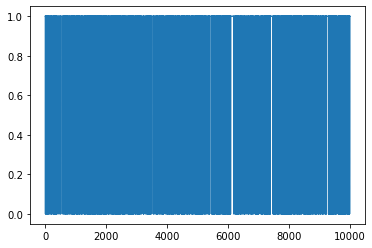

In [350]:
# model
model = ChengMNIST()

# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# loss 
loss_func = nn.CrossEntropyLoss()

train(model, train_dataloader, 10, optimizer, loss_func)
   
accuracy, corrects = test(model, test_dataloader)


In [353]:
accuracy

tensor(0.9376)

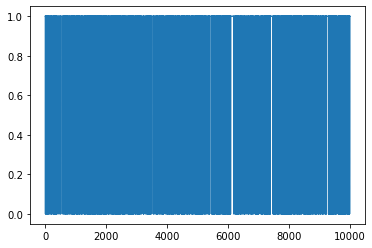

In [355]:
plt.plot(list(range(len(corrects))), corrects.numpy())
plt.show()

## Deep Model
 - 5 layers
 - 10 channels
 

In [340]:
class ChengMNIST2(nn.Module):
    def __init__(self):
        super(ChengMNIST2, self).__init__()
        self._cv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, padding=1, stride=1, bias=True)       
        self._cv2 = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, padding=1, stride=1, bias=True)

        self._flatten1 = nn.Flatten()
        self._linear1 = nn.Linear(in_features=490, out_features=100)
        self._linear2 = nn.Linear(in_features=100, out_features=50)
        self._linear3 = nn.Linear(in_features=50, out_features=10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self._cv1(x), kernel_size=2))
        x = F.relu(F.max_pool2d(self._cv2(x), kernel_size=2))    
              
        x = self._flatten1(x)
#         print(x.size())
        
        x = self._linear1(x)
        x = self._linear2(x)
        x = self._linear3(x)
        return x

In [356]:
# model
model = ChengMNIST2()

# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# loss 
loss_func = nn.CrossEntropyLoss()

train_losses = train(model, train_dataloader, 10, optimizer, loss_func)
accuracy, corrects = test(model, test_dataloader)
accuracy

epochs: 0, train accuracy: 0.15625
epochs: 0, train accuracy: 0.84375
epochs: 0, train accuracy: 0.84375
epochs: 0, train accuracy: 0.75
epochs: 0, train accuracy: 0.875
epochs: 0, train accuracy: 0.875
epochs: 0, train accuracy: 0.875
epochs: 0, train accuracy: 0.9375
epochs: 0, train accuracy: 0.875
epochs: 0, train accuracy: 0.90625
epochs: 0, train accuracy: 0.90625
epochs: 0, train accuracy: 0.90625
epochs: 0, train accuracy: 0.96875
epochs: 0, train accuracy: 0.96875
epochs: 0, train accuracy: 1.0
epochs: 0, train accuracy: 0.9375
epochs: 0, train accuracy: 0.96875
epochs: 0, train accuracy: 1.0
epochs: 0, train accuracy: 0.9375
epochs: 1, train accuracy: 0.96875
epochs: 1, train accuracy: 0.96875
epochs: 1, train accuracy: 0.9375
epochs: 1, train accuracy: 0.96875
epochs: 1, train accuracy: 1.0
epochs: 1, train accuracy: 0.9375
epochs: 1, train accuracy: 0.875
epochs: 1, train accuracy: 0.9375
epochs: 1, train accuracy: 0.90625
epochs: 1, train accuracy: 1.0
epochs: 1, train acc

tensor(0.9839)

Text(0, 0.5, 'negative log likelihood(cross entropy) loss')

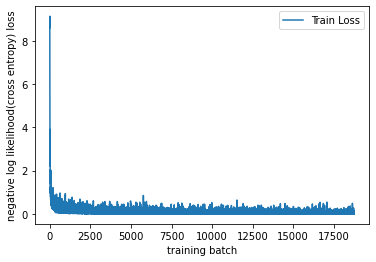

In [359]:
fig = plt.figure()
plt.plot(list(range(len(train_losses))), train_losses)
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('training batch')
plt.ylabel('negative log likelihood(cross entropy) loss')